[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MBanuelos/grad-numerical/blob/main/week7.ipynb)

**Name:** [Type Your Name Here]

# MATH 291T - Week 7 Participation

---

To begin all assignments (whether participation or homework), please save a copy of this notebook to your Google Drive by clicking **File -> Save a copy in Drive**

---


In [ ]:
import numpy as np
import plotly.graph_objects as go
import scipy.misc
import scipy.integrate

from ipywidgets import interactive
import matplotlib.pyplot as plt

## Euler's Method


The notion of approximating solutions to differential equations is simple in principle:

* make a discrete approximation to the derivative and
* step forward through time as a difference equation.

**Practice**

Consider the differential equation $x' = 0.5x$ with $x(0)=6$.

Write a function that takes the following as input:

* a function $f$
* a step size $h$
* an initial condition
* a start time
* an end time

and outputs:

* the estimated solution using Euler's method & the grid where solution is evaluated


Graph your approximation with 3 different values of $h$.


In this case, the analytical solution is

```python
f = lambda x: 6 * np.exp(0.5*x)
```

In [ ]:
def euler(f,x0,t0,tmax,dt):
  # write out the quantities needed (number of points, grid, solution)
  # determine number of points needed, N

  # define t based on N

  # define x

  # define x[0] to be the initial condition

  # for loop to update the solution x(t) with Euler method
  for n in range(len(t) - 1):

  return t, x

In [ ]:
fp = lambda t, x: 0.5*x
te, xe = euler(fp, x0=6, t0=0, tmax=10, dt=1e-3)
te2, xe2 = euler(fp, x0=6, t0=0, tmax=10, dt=1)

# now make some plots!
f = lambda t, x: 6 * np.exp(0.5*x)
#t_true = np.linspace(0,10,1000)
f_true = f(0, te)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=te, y=xe, mode='markers', name="Euler dt=1e-02"))
fig.add_trace(go.Scatter(x=te2, y=xe2, mode='markers', name="Euler dt=1"))
fig.add_trace(go.Scatter(x=te, y=f_true, mode='markers', name="Analytical Sol."))
fig.show()

Calculate the point-wise error (i.e., the error at each point you are estimating the solution) and 1) find the maximum and 2) graph them.

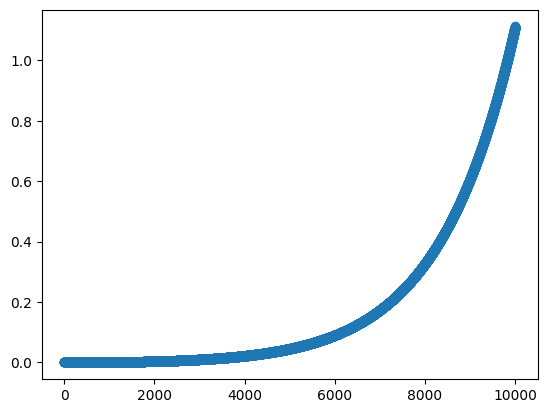

In [ ]:
plt.plot(f_true-xe, 'o')

## Midpoint Method

Now we get to improve upon Euler's method. There is a long history of wonderful improvements to the classic Euler's method - some that work in special cases, some that resolve areas where the error is going to be high, and some that are great for general purpose numerical solutions to ODEs with relatively high accuracy. In this section we'll make a simple modification to Euler's method that has a surprisingly great payoff in the error rate.

Let's return to the simple differential equation

$$
x'= - 0.5 x
$$

with $x(0)=6$ that we saw before. Now we'll propose a slightly different method for approximating the solution.

At $t=0$, we know that $x(0)=6$. If we use the slope at time $t=0$ to step forward in time then we will get the Euler approximation of the solution. Consider this alternative approach:

* Use the slope at time $t=0$ and move half a step forward.
* Find the slope at the half-way point
* Then use the slope from the half way point to go a full step forward from time $t=0$.

Let's build this idea together:

* What is the slope at time $t=0$? $x'(0) = ?$.
* Use this slope to step a half step forward and find the $x$ value: $x(0.5) \approx ?$
* Now use the differential equation to find the slope at time  
$t=0.5$. $x'(0.5) = ?$.
* Now take your answer from the previous step, and go one full step forward from time $t=0$. What $x$ value do you end up with?
* Repeat the process outlined in part (a) to approximate the solution to the differential equation at times $t=2, 3, \ldots$ 6. Plot the analytical solution, the approximation using Euler's method, and this new method.

**Practice**

Complete the code below to implement the midpoint method in one dimension.

Then, apply it to the previous problem ($x' = -0.5x$).

In [ ]:
def midpoint1d(f,x0,t0,tmax,dt):
    N = int(np.floor((tmax-t0)/dt) +1)
    t = np.linspace(t0, tmax, N)# build the times
    x = np.zeros(len(t))# build an array for the x values
    x[0] = x0# build the initial condition
    # On the next line: be careful about how far you're looping
    for n in range( ... ):
        # The interesting part of the code goes here.
    return t, x

In [ ]:
f2 = lambda t, x: 3*x + t
print(midpoint1d(f2, x0 = 4, t0 = 0, tmax = 1, dt = 1))

(array([0., 1.]), array([ 4. , 34.5]))


In [ ]:
f1 = lambda t, x: 0.2*x + 1
print(midpoint1d(f1, x0 = 0, t0 = 0, tmax = 1, dt = 1))

(array([0., 1.]), array([0. , 1.1]))


In [ ]:
# write some code below to make some plots
fig = go.Figure()
#fig.add_trace(go.Scatter(x=, y=, mode='markers', name="Midpoint Method"))
#fig.add_trace(go.Scatter(x=, y=, mode='markers', name="Analytical Sol."))

The goal in building the midpoint method was to hopefully capture some of the upcoming curvature in the solution before we overshot it.


**Practice**

Consider the differential equation $x' = -1/3x + \sin(t)$ with initial condition $x(0)=1$ on the domain $t\in[0,4]$. First get a numerical solution with Euler's method using $\Delta t = 0.1$. Then get a numerical solution with the midpoint method using the same value for $\Delta t$. Plot the two solutions on top of each other along with the exact solution

$$
x(t) = 1/10 \left(19 e^{-t/3} + 3 \sin(t) - 9 \cos(t) \right)
$$

What do you observe? What do you observe if you make $\Delta t$ a bit larger (like 0.2 or 0.3)? What do you observe if you make $\Delta t$ very very small (like 0.001 or 0.0001)?

In [ ]:
# define the right-hand side (rhs)
fp = lambda t, x: -1/3*x + np.sin(t)
# set dt
dt1 = 0.1
# solve with Euler's method
te, xe = ...
# solve with Midpoint method
tm, xm = ...

# define the analytical solution
f = lambda t, x: 1/10 *(19*np.exp(-t/3) + 3*np.sin(t) - 9*np.cos(t))
# evaluate the solution at the grid above
ftrue = f(te, 0)

In [ ]:
# add plots and analysis :]

## Interactive ODEs

In [ ]:
f = lambda t, x: -(1/3.0)*x + np.sin(t)
t0 = 0

In [ ]:
def eulerAnimator(x0,tmax,dt):
    # call on the euler function to build the solution
    t, x = euler(f,x0,t0,tmax,dt)
    plt.plot(t, x, 'b-') # plot the solution
    plt.xlim(0,30)
    plt.ylim( np.min(x)-1, np.max(x)+1)
    plt.grid()
    plt.show()

In [ ]:
interactive_plot = interactive(eulerAnimator,
                               x0=(-2, 5, 0.5),
                               tmax=(1, 30, 0.1),
                               dt=(0.01, 0.75, 0.005))
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='x0', max=5.0, min=-2.0, step=0.5), FloatSlider(value…

**Practice**

Modify the previous exercise to use a different numerical solver (e.g. the midpoint method) instead of Euler’s method.

IF Time permits